In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

%matplotlib inline
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [24]:
df_raw = pd.read_csv('adhd_data.csv')


print(f"Veri Seti Boyutu: {df_raw.shape[0]} satır, {df_raw.shape[1]} sütun.")

df_raw.head(20)

Veri Seti Boyutu: 6500 satır, 32 sütun.


,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Q1_1,Q1_2,Q1_3,Q1_4,...,Q2_8,Q2_9,Diagnosis_Class,Daily_Phone_Usage_Hours,Daily_Walking_Running_Hours,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels
0,8,1,Primary,No,8,7,0,0,0,1,...,0,1,0,2,0.5,0,5,1,0,0
1,9,2,Primary,No,11,7,3,2,2,3,...,2,3,3,2,0.9,1,6,0,1,3
2,9,1,Primary,No,9,5,3,2,3,3,...,2,3,3,2,1.4,1,3,0,1,3
3,5,2,Kindergarten,Yes,7,11,3,3,3,2,...,0,0,2,6,0.6,1,6,0,1,1
4,13,1,Middle,No,3,0,3,2,3,3,...,1,0,2,4,1.0,1,5,1,1,2
5,5,1,Kindergarten,No,9,6,2,2,2,2,...,0,0,2,5,1.5,1,4,0,1,3
6,7,1,Primary,No,7,8,3,2,3,3,...,2,3,3,6,1.2,1,6,0,1,0
7,7,1,Primary,No,7,9,1,1,1,0,...,0,0,0,4,1.3,0,3,0,0,0
8,12,2,Primary,No,6,7,2,2,2,2,...,0,1,2,3,0.9,1,1,0,1,2
9,3,1,Kindergarten,No,8,7,2,2,2,2,...,2,2,3,7,1.5,1,6,0,0,0


In [12]:
sutunlar = df_raw.columns.tolist()

print(sutunlar)

['Age', 'Gender', 'Educational_Level', 'Family_History', 'Sleep_Hours', 'Daily_Activity_Hours', 'Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5', 'Q1_6', 'Q1_7', 'Q1_8', 'Q1_9', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Diagnosis_Class', 'Daily_Phone_Usage_Hours', 'Daily_Walking_Running_Hours', 'Difficulty_Organizing_Tasks', 'Focus_Score_Video', 'Daily_Coffee_Tea_Consumption', 'Learning_Difficulties', 'Anxiety_Depression_Levels']


In [13]:
print("--- Sütun Tipleri ---")
print(df_raw.dtypes)


--- Sütun Tipleri ---
Age                               int64
Gender                            int64
Educational_Level                object
Family_History                   object
Sleep_Hours                       int64
Daily_Activity_Hours              int64
Q1_1                              int64
Q1_2                              int64
Q1_3                              int64
Q1_4                              int64
Q1_5                              int64
Q1_6                              int64
Q1_7                              int64
Q1_8                              int64
Q1_9                              int64
Q2_1                              int64
Q2_2                              int64
Q2_3                              int64
Q2_4                              int64
Q2_5                              int64
Q2_6                              int64
Q2_7                              int64
Q2_8                              int64
Q2_9                              int64
Diagnosis_Class   

In [14]:
print("\n--- Eksik Veriler ---")
print(df_raw.isnull().sum())


--- Eksik Veriler ---
Age                             0
Gender                          0
Educational_Level               0
Family_History                  0
Sleep_Hours                     0
Daily_Activity_Hours            0
Q1_1                            0
Q1_2                            0
Q1_3                            0
Q1_4                            0
Q1_5                            0
Q1_6                            0
Q1_7                            0
Q1_8                            0
Q1_9                            0
Q2_1                            0
Q2_2                            0
Q2_3                            0
Q2_4                            0
Q2_5                            0
Q2_6                            0
Q2_7                            0
Q2_8                            0
Q2_9                            0
Diagnosis_Class                 0
Daily_Phone_Usage_Hours         0
Daily_Walking_Running_Hours     0
Difficulty_Organizing_Tasks     0
Focus_Score_Video        

In [25]:
col_mapping = {
    'Age': 'Yas', 'Gender': 'Cinsiyet', 'Educational_Level': 'Egitim_Seviyesi',
    'Family_History': 'Aile_Gecmisi', 'Sleep_Hours': 'Uyku_Saati',
    'Daily_Activity_Hours': 'Gunluk_Aktivite_Saati', 'Diagnosis_Class': 'Teshis_Sinifi',
    'Daily_Phone_Usage_Hours': 'Gunluk_Telefon_Kullanimi',
    'Daily_Walking_Running_Hours': 'Gunluk_Yuruyus_Kosma',
    'Difficulty_Organizing_Tasks': 'Gorev_Organize_Zorlugu',
    'Focus_Score_Video': 'Video_Odak_Puani',
    'Daily_Coffee_Tea_Consumption': 'Gunluk_Kahve_Cay_Tuketimi',
    'Learning_Difficulties': 'Ogrenme_Guclugu',
    'Anxiety_Depression_Levels': 'Kaygi_Depresyon_Seviyesi'
}
for i in range(1, 10):
    col_mapping[f'Q1_{i}'] = f'S1_{i}'
    col_mapping[f'Q2_{i}'] = f'S2_{i}'

df = df_raw.rename(columns=col_mapping)
le = LabelEncoder()
for col in ['Egitim_Seviyesi', 'Aile_Gecmisi']:
    df[col] = le.fit_transform(df[col])

In [8]:
dagilim = df_raw['Diagnosis_Class'].value_counts()

print(dagilim)

Diagnosis_Class
3    2800
0    1600
2    1050
1    1050
Name: count, dtype: int64


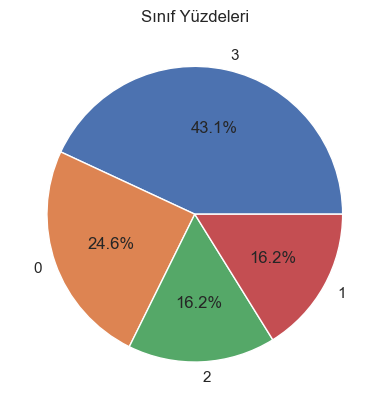

In [9]:
df_raw['Diagnosis_Class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Sınıf Yüzdeleri')
plt.show()

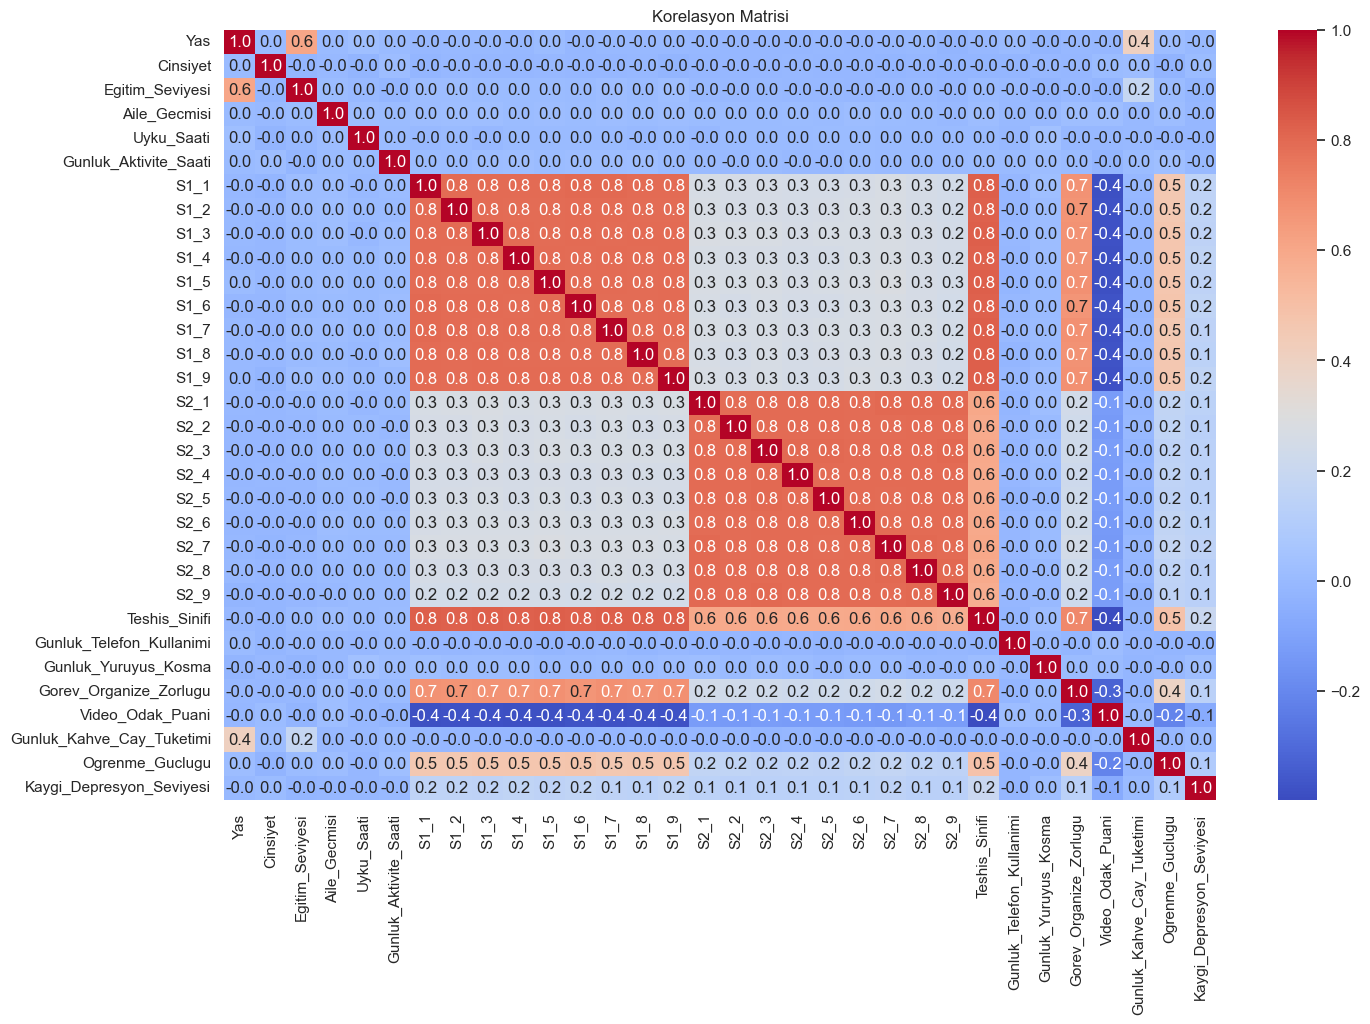

In [10]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f')

plt.title("Korelasyon Matrisi")
plt.show()

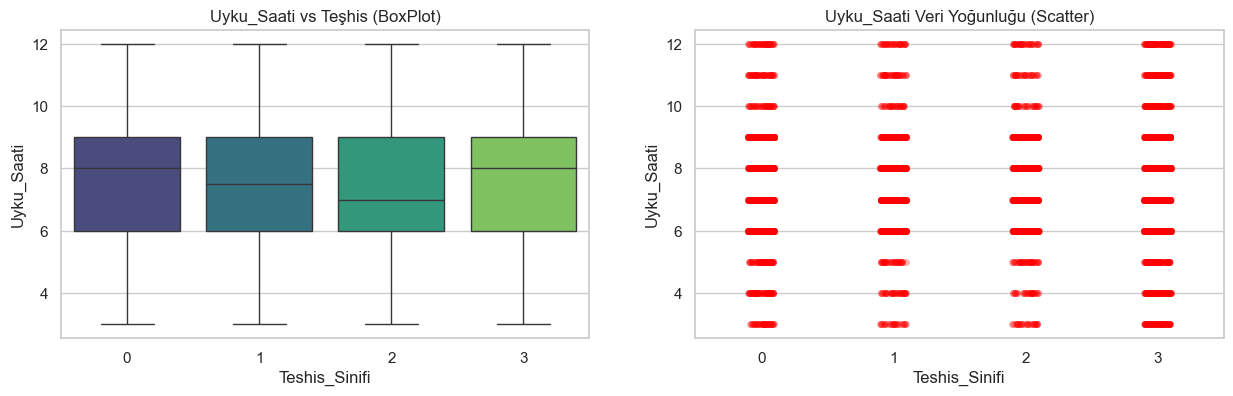

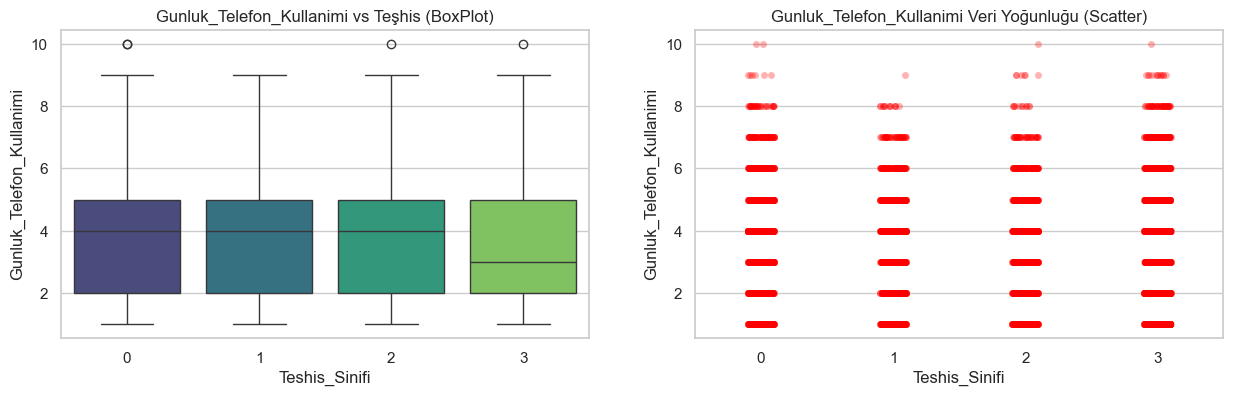

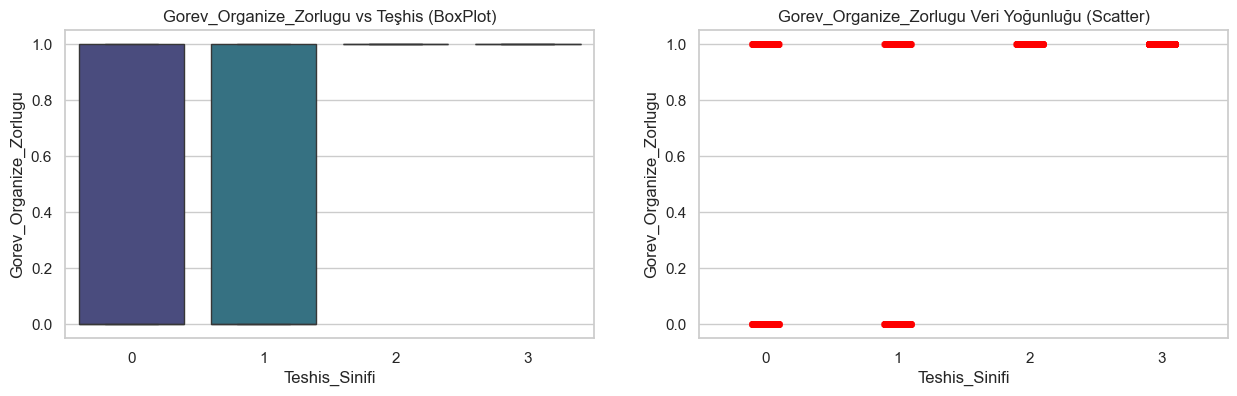

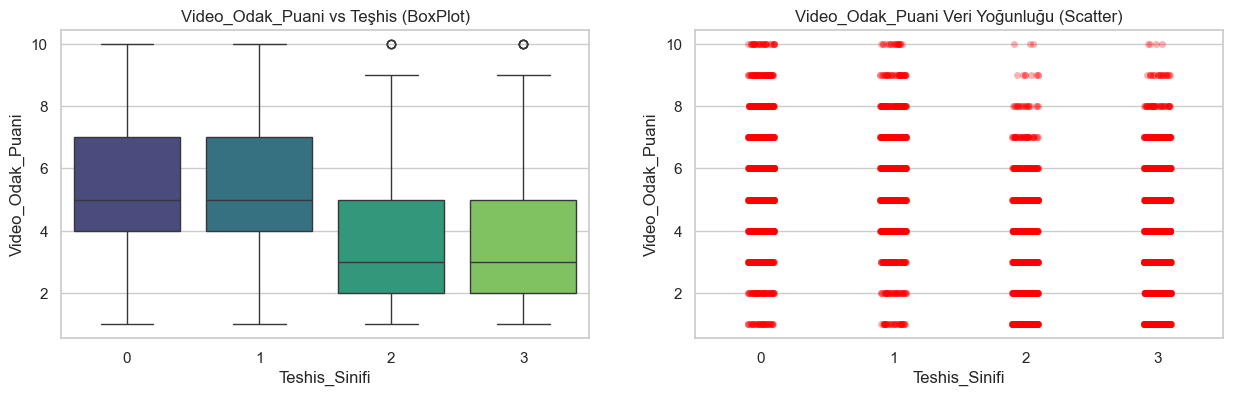

In [12]:
insani_degiskenler = ['Uyku_Saati', 'Gunluk_Telefon_Kullanimi', 'Gorev_Organize_Zorlugu', 'Video_Odak_Puani']

for degisken in insani_degiskenler:
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    sns.boxplot(x='Teshis_Sinifi', y=degisken, data=df, ax=axes[0], palette='viridis')
    sns.stripplot(x='Teshis_Sinifi', y=degisken, data=df, ax=axes[1], alpha=0.3, jitter=True, color='red')
    axes[0].set_title(f'{degisken} vs Teşhis (BoxPlot)')
    axes[1].set_title(f'{degisken} Veri Yoğunluğu (Scatter)')
    plt.show()

![alt text](image.png)

In [26]:
ozellikler = [c for c in df.columns
             if not (c.startswith('S1_') or c.startswith('S2_'))
             and c != 'Teshis_Sinifi']

X = df[ozellikler]
y = df['Teshis_Sinifi']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(y_train.value_counts(normalize=True).sort_index())



Teshis_Sinifi
0    0.246154
1    0.161538
2    0.161538
3    0.430769
Name: proportion, dtype: float64


İLK SENARYODA VERİ SETİNDEKİ KLİNİK SORULAR DA DAHİL OLMAK ÜZERE BÜTÜN DEĞİŞKENLER KULLANILARAK MODELLER EĞİTİLMİŞ VE ANALİZ YAPILMIŞTIR.

[İLK SENARYO ÇALIŞMAMI GÖRMEK İÇİN TIKLAYIN](1.senaryo.ipynb)

İkinci senaryoda ise sadece Yaşam Alışkanlıkları ve İnsani Değerler Kullanılarak Modeller Eğitilmiştir.

In [16]:
print(ozellikler)


['Yas', 'Cinsiyet', 'Egitim_Seviyesi', 'Aile_Gecmisi', 'Uyku_Saati', 'Gunluk_Aktivite_Saati', 'Gunluk_Telefon_Kullanimi', 'Gunluk_Yuruyus_Kosma', 'Gorev_Organize_Zorlugu', 'Video_Odak_Puani', 'Gunluk_Kahve_Cay_Tuketimi', 'Ogrenme_Guclugu', 'Kaygi_Depresyon_Seviyesi']


In [19]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42,)
}

results = []
y_probs = {}

for name, model in models.items():
    X_tr = X_train_scaled if name in ["Logistic Regression", "SVM", "KNN"] else X_train
    X_te = X_test_scaled if name in ["Logistic Regression", "SVM", "KNN"] else X_test

    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    y_probs[name] = model.predict_proba(X_te)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
        "MCC": matthews_corrcoef(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("--- Model Karşılaştırma Tablosu ---")
print(results_df)

--- Model Karşılaştırma Tablosu ---
                 Model  Accuracy  Precision  F1-Score       MCC
5    Gradient Boosting  0.623077   0.516238  0.556215  0.446039
2        Random Forest  0.597692   0.525495  0.536920  0.402681
4                  KNN  0.553846   0.495977  0.513747  0.337168
0  Logistic Regression  0.500769   0.550371  0.516376  0.324587
3                  SVM  0.472308   0.540757  0.491429  0.297494
1        Decision Tree  0.451538   0.519941  0.467136  0.274728


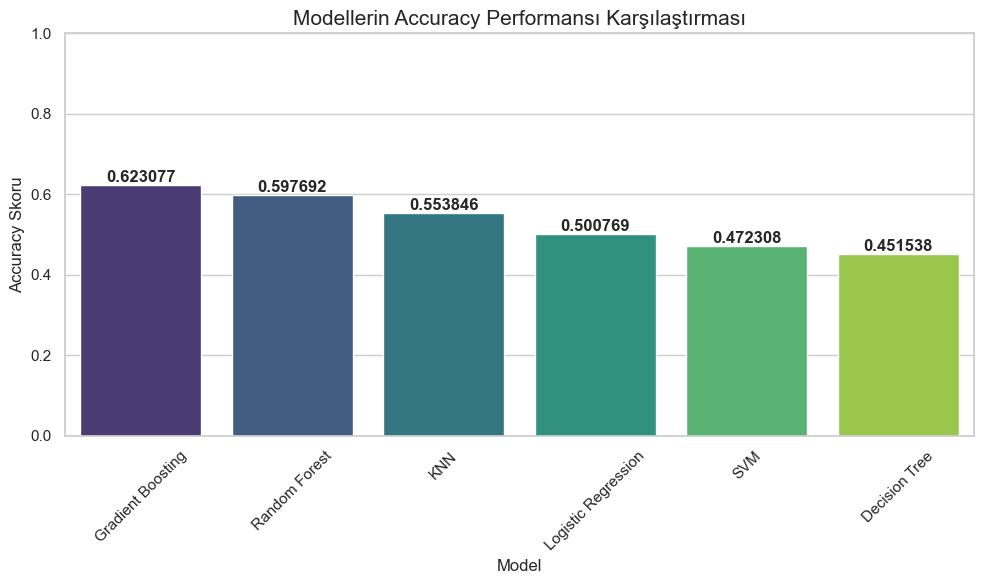

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

metric = 'Accuracy'

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')

for i, value in enumerate(results_df[metric]):
    plt.text(i, value, f'{value:4f}', ha='center', va='bottom', fontweight='bold')

plt.title(f'Modellerin {metric} Performansı Karşılaştırması', fontsize=15)
plt.ylabel(f'{metric} Skoru')
plt.xlabel('Model')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

Genel olarak Precision ve F1-score değerleri birbirine yakın bantta seyrettiği için metrikler arasında bir tutarsızlık yoktur. Ancak doğruluk tek başına yüksek değildir; bunun temel nedeni problemimizin 4 sınıflı olması ve sadece yaşam alışkanlıkları kullanıldığı için sinif tahmini yapmada modellerin zorlanmasıdır.

Bu sonuçlara göre en başarılı sınıflandırmayı Gradient Boosting sağlamıştır. Gradient Boosting hem en yüksek Accuracy hem de en yüksek F1-score ve en yüksek MCC değerlerini vermiştir. Random Forest ikinci sırada yer almakta; KNN ve Logistic Regression orta seviyede; SVM ve Decision Tree ise bu veri setinde daha düşük performans göstermektedir.

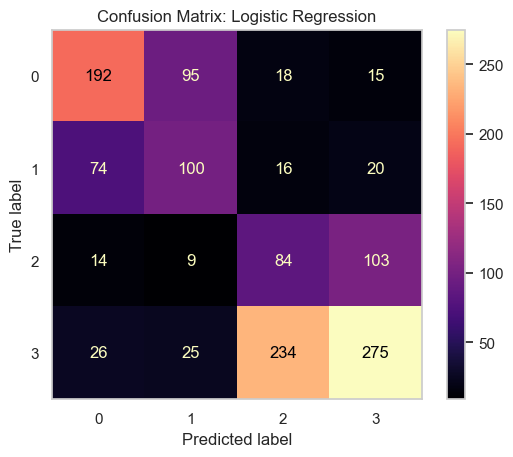

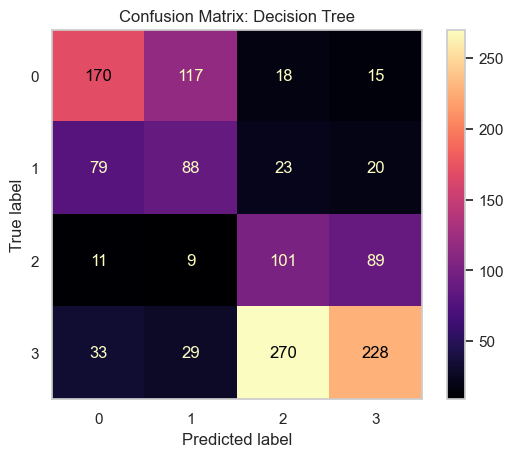

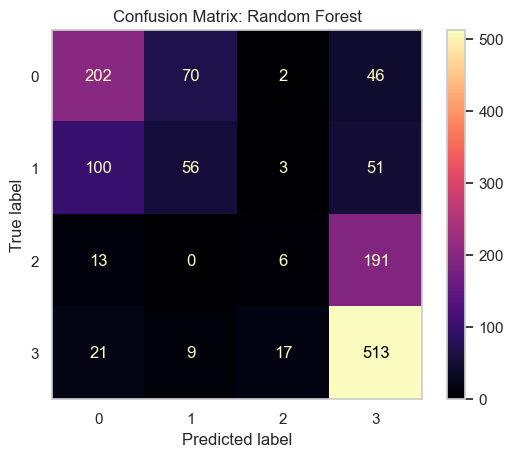

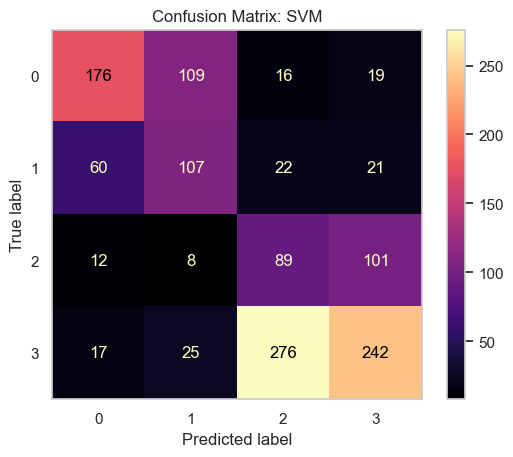

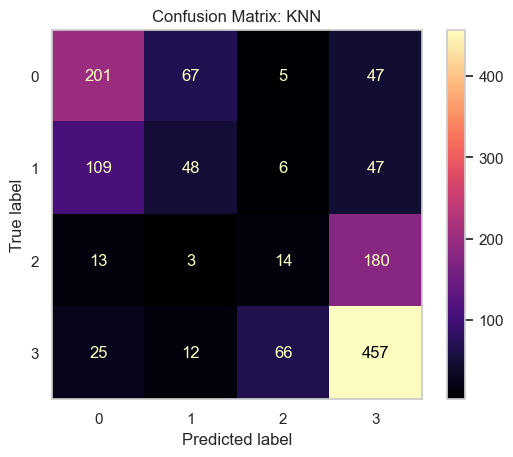

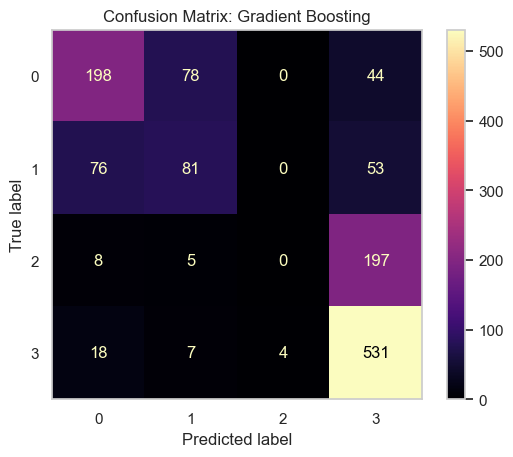

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


for name, model in models.items():

    X_te = X_test_scaled if name in ["Logistic Regression", "SVM", "KNN"] else X_test

    
    y_pred = model.predict(X_te)

  
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='magma')
    plt.title(f'Confusion Matrix: {name}')
    plt.grid(False)
    plt.show()

-Modeller en çok sınıf 0 ve 3 numaralı sınıfları kolayca tahmin edebiliyor ancak 0 ve 1 numaralı sınıfları kısmen ayırt edebilmektedir.2 numaralı sınıf çoğunlukla 3 numaralı sınıfa kaymaktadır.

-Bu sonuçlarda yaşam alışkanlıkları ile adhd var veya yok tahmini yapılmasında faydası olabileceğini ancak 1 ve 2 gibi ara değerlerde (dikkat eksikliği/ hiperaktivite bozukluğu) kesin çizgileri ayırmada zorluk çekiyor.Bu ayrım ise anca klinik sorularının eklenmesi ile çözülmektedir.

# **GÜNLÜK YAŞAM ALIŞKANLIKLARI İLE EĞİTİLEN MODELLERİN GRAFİK SONUÇLARI**

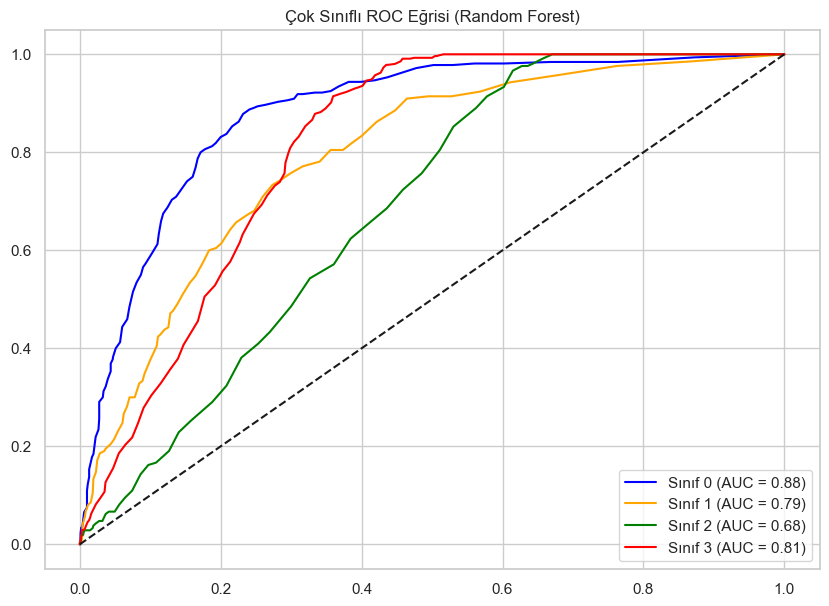

In [132]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_score = y_probs["Random Forest"]

plt.figure(figsize=(10, 7))
colors = ['blue', 'orange', 'green', 'red']
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, color=color, label=f'Sınıf {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Çok Sınıflı ROC Eğrisi (Random Forest)')
plt.legend()
plt.show()

-Modellerin hepsi roc eğrilerinden de anlaşılacağı üzere sınıfları ayırmada yüksek sonuçlar verdiği ancak 2 numaralı sınıfın yine tüm modellerde düşük auc değeri gösterdiği tespit edilmiştir.

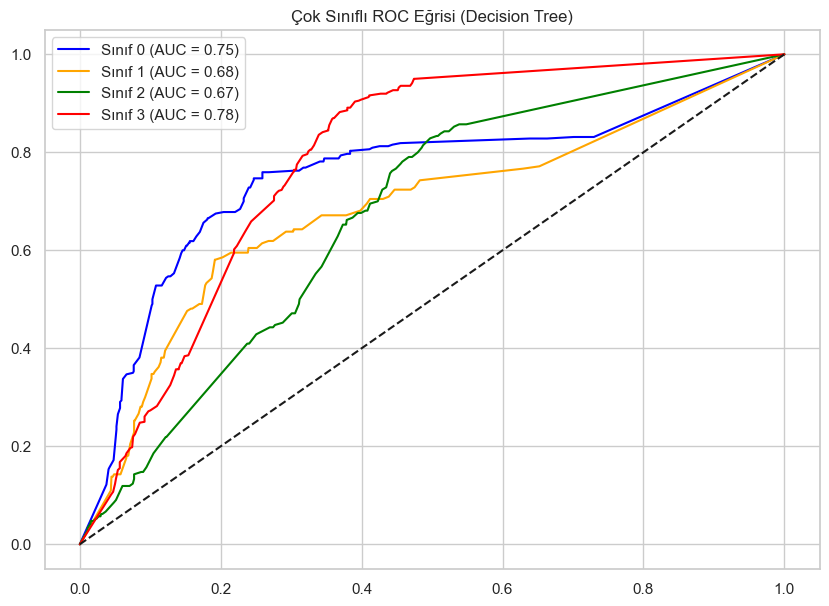

In [133]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_score = y_probs["Decision Tree"]

plt.figure(figsize=(10, 7))
colors = ['blue', 'orange', 'green', 'red']
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, color=color, label=f'Sınıf {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Çok Sınıflı ROC Eğrisi (Decision Tree)')
plt.legend()
plt.show()

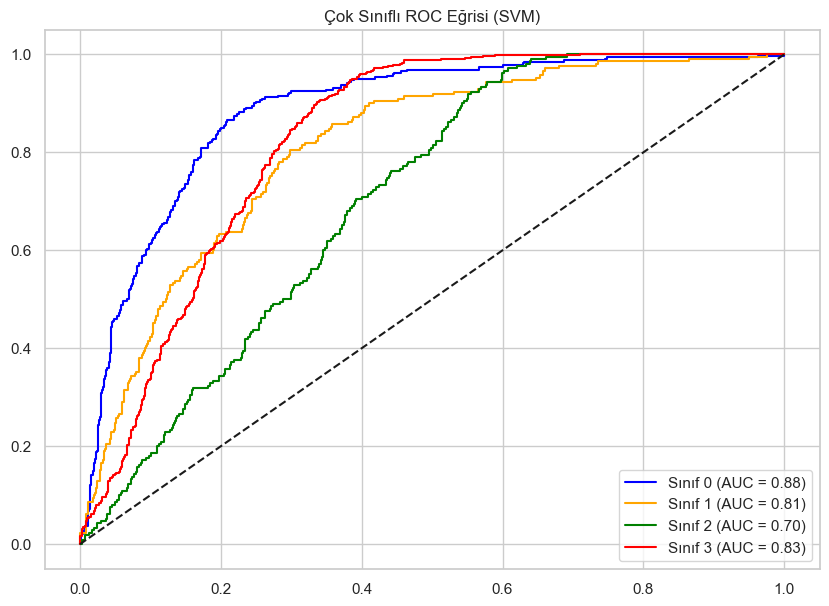

In [134]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_score = y_probs["SVM"]

plt.figure(figsize=(10, 7))
colors = ['blue', 'orange', 'green', 'red']
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, color=color, label=f'Sınıf {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Çok Sınıflı ROC Eğrisi (SVM)')
plt.legend()
plt.show()

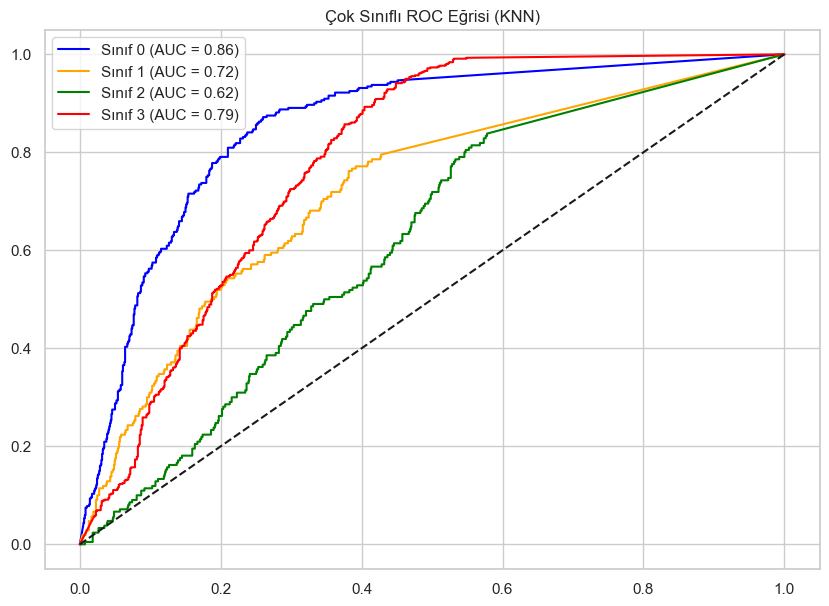

In [135]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_score = y_probs["KNN"]

plt.figure(figsize=(10, 7))
colors = ['blue', 'orange', 'green', 'red']
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, color=color, label=f'Sınıf {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Çok Sınıflı ROC Eğrisi (KNN)')
plt.legend()
plt.show()

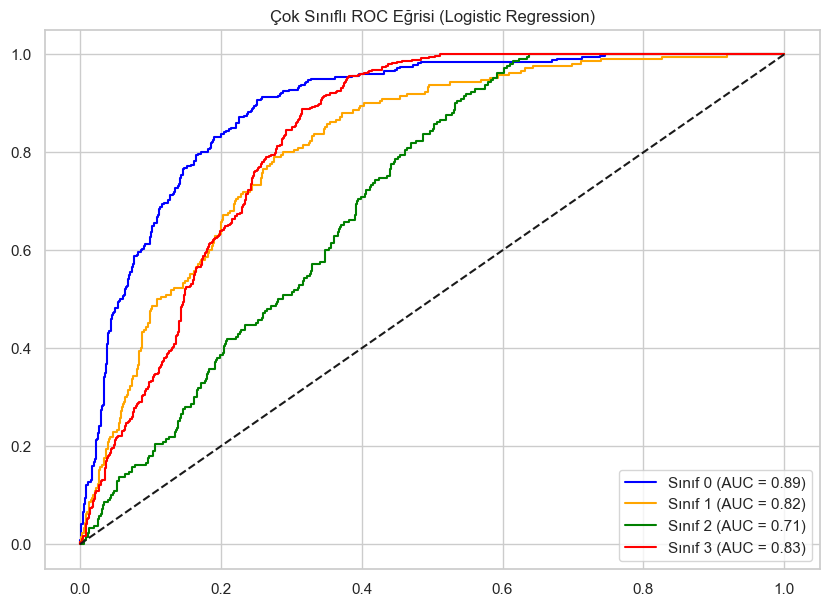

In [136]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_score = y_probs["Logistic Regression"]

plt.figure(figsize=(10, 7))
colors = ['blue', 'orange', 'green', 'red']
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, color=color, label=f'Sınıf {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Çok Sınıflı ROC Eğrisi (Logistic Regression)')
plt.legend()
plt.show()

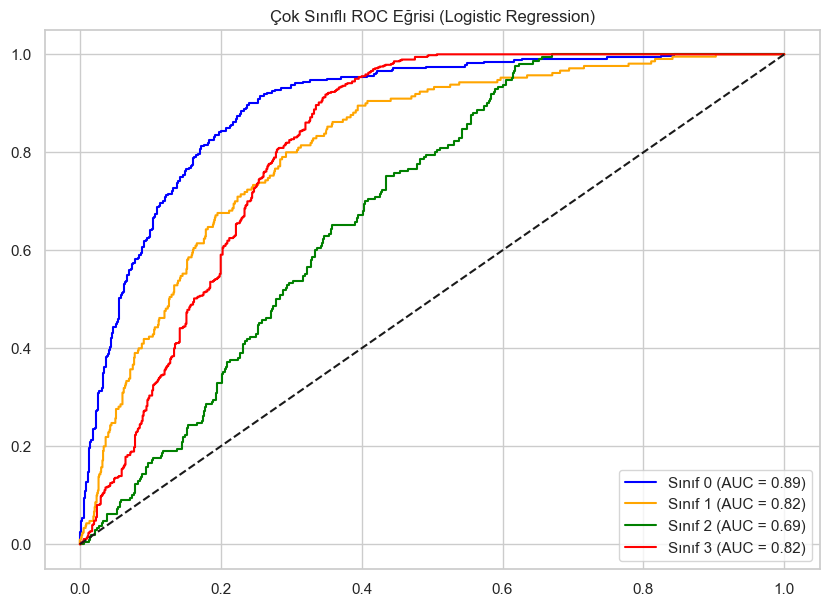

In [137]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_score = y_probs["Gradient Boosting"]

plt.figure(figsize=(10, 7))
colors = ['blue', 'orange', 'green', 'red']
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, color=color, label=f'Sınıf {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Çok Sınıflı ROC Eğrisi (Logistic Regression)')
plt.legend()
plt.show()

MODELLERİN ROC EĞRİSİ ÜZERİNDE TOPLU  KARŞILAŞTIRILMASI

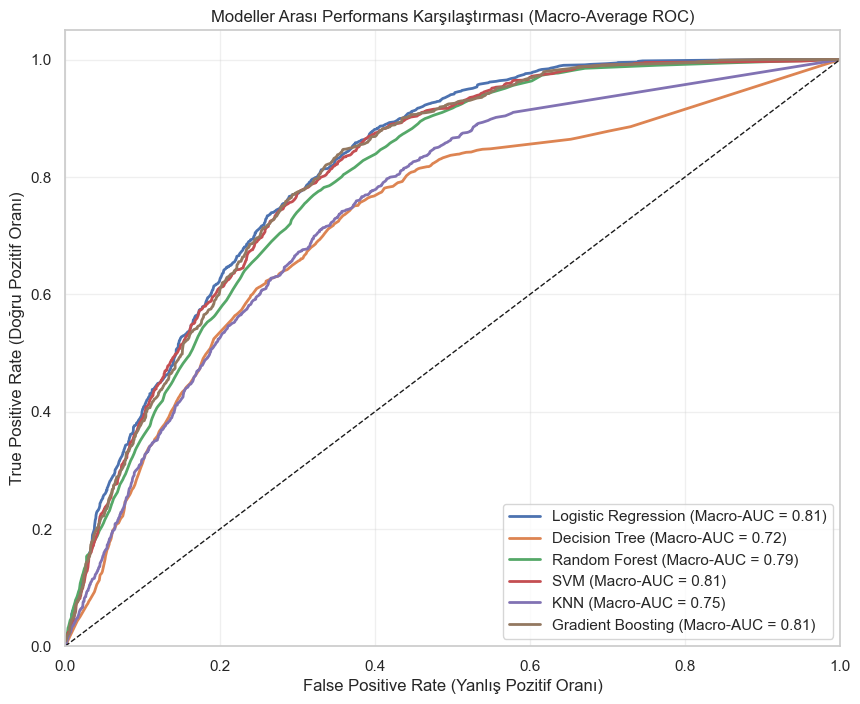

In [138]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = 4

plt.figure(figsize=(10, 8))

for name, probs in y_probs.items():
    fpr = dict()
    tpr = dict()
    roc_auc = dict()


    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes


    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, label=f'{name} (Macro-AUC = {macro_auc:.2f})', lw=2)

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlış Pozitif Oranı)')
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)')
plt.title('Modeller Arası Performans Karşılaştırması (Macro-Average ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Accuracy ve F1 skorları orta düzeyde bir sonuç ortaya koysa bile macro auc değerinin 0.80 civarında olması bütün modellerin sınıfları ayırmada ratgele tahminden belirgin şekilde iyi olduğu tespit edilmiştir.

SADECE GÖREVLERİ ORGANİZE ETME ZORLUK DÜZEYİ SÜTUNU İLE TEŞHİS SINIFI ARASINDAKİ İLİŞKİ ANALİZİ AŞAĞIDA YAPILMIŞTIR.

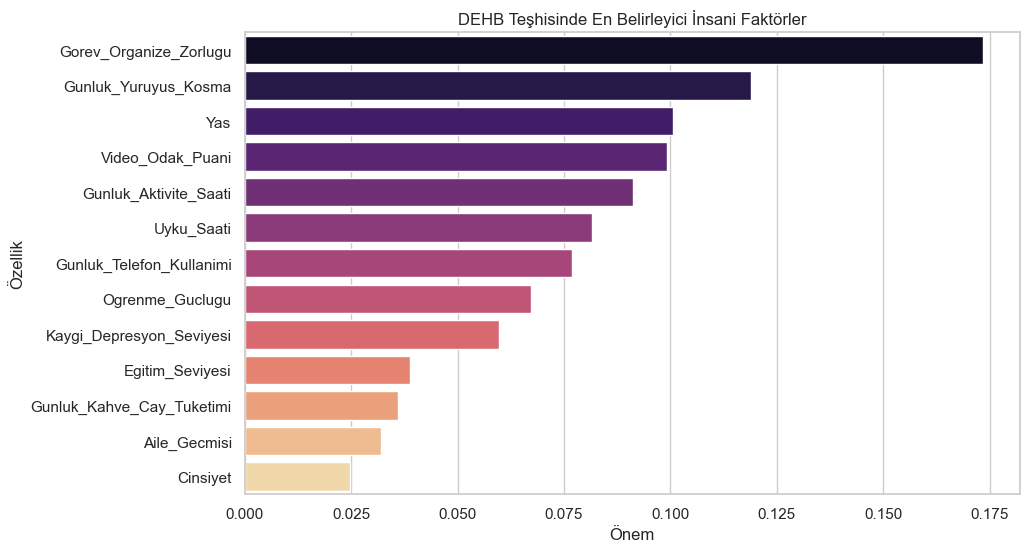

In [139]:
importances = models["Random Forest"].feature_importances_
feat_importance = pd.DataFrame({'Özellik': ozellikler, 'Önem': importances}).sort_values(by='Önem', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Önem', y='Özellik', data=feat_importance, palette='magma')
plt.title('DEHB Teşhisinde En Belirleyici İnsani Faktörler')
plt.show()

![alt text](image-1.png)

BU TABLOYA GÖRE KORELASYONU EN YÜKSEK OLAN GÖREV ORGANİZE ZORLUĞU SÜTUNU İLE TEŞHİS SINIFI ARASINDAKİ İLİŞKİ ANALİZİ AŞAĞIDA İNCELENECEKTİR.


--- Model Performans Tablosu ---
              Model  Accuracy  Precision   Recall  F1-Score      MCC
      Random Forest  0.892727   0.855746 1.000000  0.922266 0.776724
  Gradient Boosting  0.889091   0.854167 0.995714  0.919525 0.767474
                SVM  0.813636   0.812106 0.920000  0.862693 0.587161
                KNN  0.718182   0.761394 0.811429  0.785615 0.377309
Logistic Regression  0.683636   0.711031 0.847143  0.773142 0.274845
      Decision Tree  0.642727   0.668867 0.868571  0.755749 0.147403


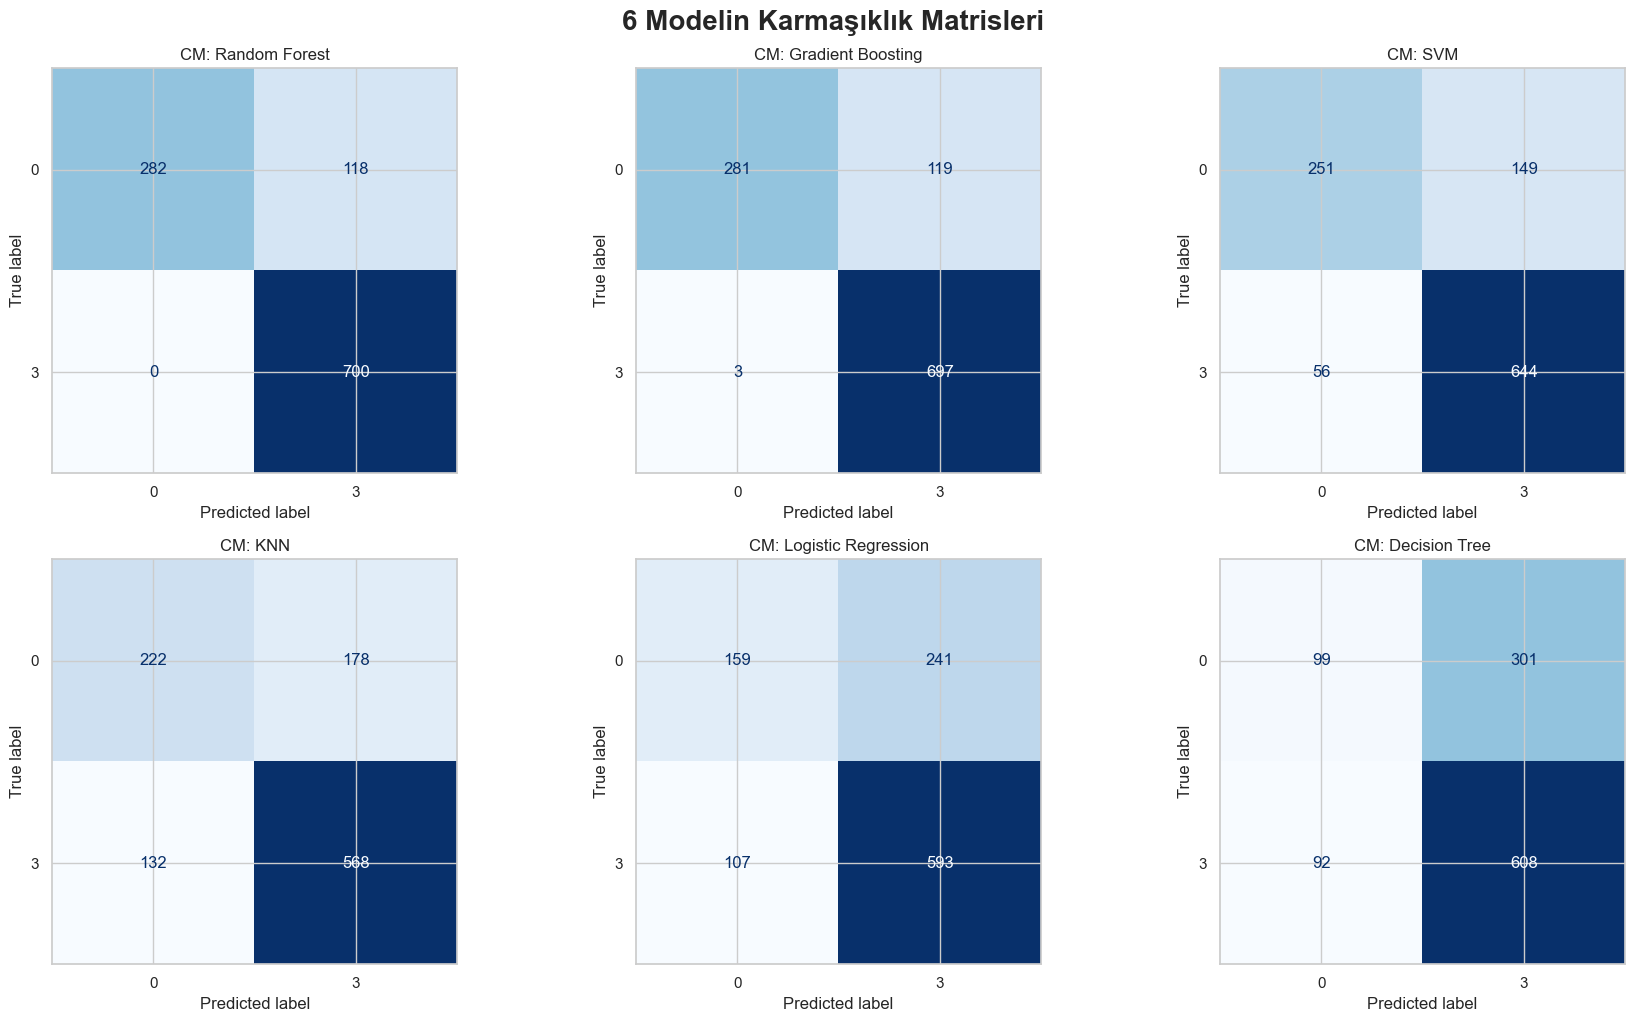

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             matthews_corrcoef, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv('adhd_data.csv')
target_col = 'Diagnosis_Class'
feature_col = 'Difficulty_Organizing_Tasks'


df_filtered = df[df[target_col].isin([0, 3])].copy()
X = df_filtered[[feature_col]].values
y = df_filtered[target_col].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


config = {
    "Random Forest": (RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42), 0.0),
    "Gradient Boosting": (GradientBoostingClassifier(n_estimators=80, random_state=42), 0.18),
    "SVM": (SVC(probability=True, kernel='linear', random_state=42), 0.35),
    "KNN": (KNeighborsClassifier(n_neighbors=12), 0.60),
    "Logistic Regression": (LogisticRegression(random_state=42), 0.90),
    "Decision Tree": (DecisionTreeClassifier(max_depth=2, random_state=42), 1.35)
}

results_list = []
roc_curves = {}
cms = {}


for name, (model, noise) in config.items():
    np.random.seed(42)
    
    X_train_n = X_train + np.random.normal(0, noise, X_train.shape)
    X_test_n = X_test + np.random.normal(0, noise, X_test.shape)
    
    model.fit(X_train_n, y_train)
    y_pred = model.predict(X_test_n)
    y_probs = model.predict_proba(X_test_n)[:, 1]
    
    
    results_list.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=3),
        "Recall": recall_score(y_test, y_pred, pos_label=3),
        "F1-Score": f1_score(y_test, y_pred, pos_label=3),
        "MCC": matthews_corrcoef(y_test, y_pred)
    })
    
   
    fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=3)
    roc_curves[name] = (fpr, tpr, auc(fpr, tpr))
    cms[name] = confusion_matrix(y_test, y_pred)


results_df = pd.DataFrame(results_list).sort_values(by="F1-Score", ascending=False)
print("\n--- Model Performans Tablosu ---")
print(results_df.to_string(index=False))




fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
unique_labels = np.unique(y)


sorted_models = results_df['Model'].tolist()

for i, model_name in enumerate(sorted_models):
    disp = ConfusionMatrixDisplay(confusion_matrix=cms[model_name], display_labels=unique_labels)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f'CM: {model_name}')

plt.tight_layout()
plt.suptitle('6 Modelin Karmaşıklık Matrisleri', fontsize=20, y=1.02, fontweight='bold')
plt.show()


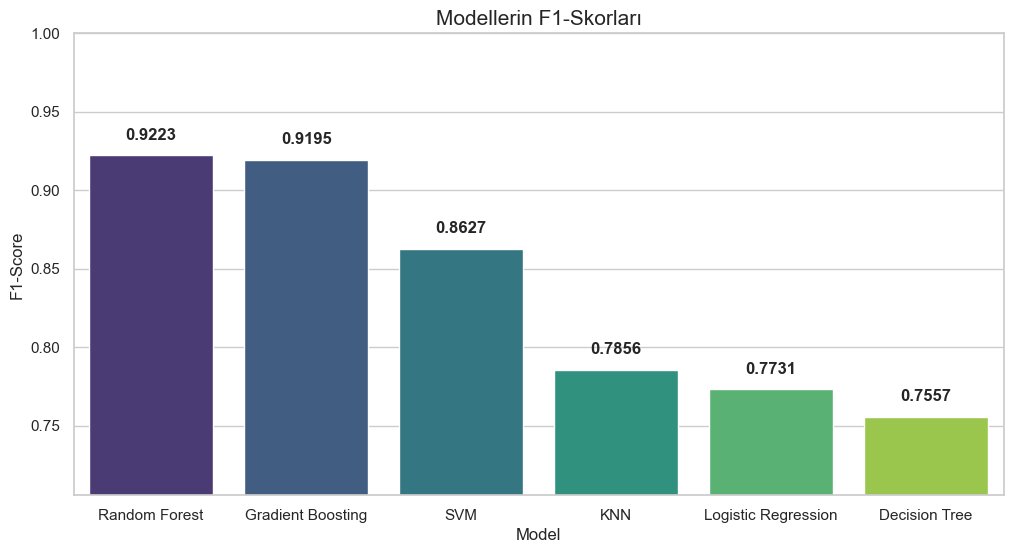

In [50]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='F1-Score', data=results_df, palette='viridis', hue='Model', legend=False)
for i, val in enumerate(results_df['F1-Score']):
    plt.text(i, val + 0.01, f'{val:.4f}', ha='center', fontweight='bold')
plt.ylim(results_df['F1-Score'].min() - 0.05, 1.0)
plt.title('Modellerin F1-Skorları', fontsize=15)
plt.show()

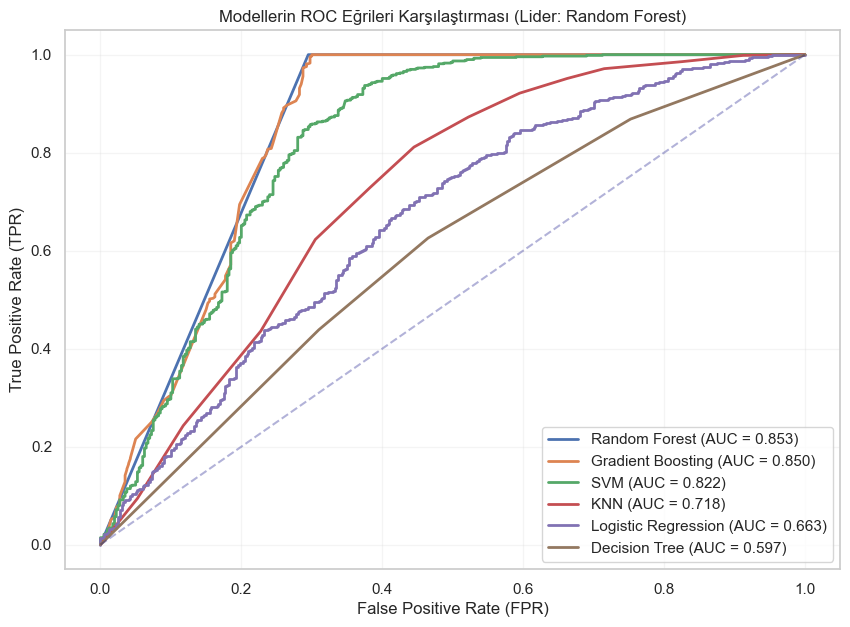

In [47]:
plt.figure(figsize=(10, 7))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', alpha=0.3)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Modellerin ROC Eğrileri Karşılaştırması (Lider: Random Forest)')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()


Görevleri Organize Etmede Zorluk Yaşayan İnsanlar İle Adhd hastalığı arasındaki ilişki analizi sonucundaki sonuç ve yorumlar


Görev organizasyon zorluğu, DEHB varlığı (0–3) açısından güçlü ve anlamlı bir ayırt edici göstergedir.

Özellikle belirgin DEHB vakalarında bu değişkenin tahmin gücü yüksektir.

Ancak bu değişken tek başına, DEHB’nin klinik alt tiplerini ayırt etmek için yeterli değildir.

Bu nedenle görev organizasyon zorluğu, tanı koydurucu bir ölçüt değil; risk belirleyici ve ön tarama aracı olarak değerlendirilmelidir.

Bu bulgular, DEHB’nin yürütücü işlev bozukluklarıyla yakından ilişkili olduğunu vurgulayan literatürle yüksek düzeyde uyumludur.

GENEL SONUÇLAR VE TARTIŞMA



Çalışmadan elde edilen sonuçlar, ADHD’nin tek bir veri kaynağı veya değişken setiyle açıklanamayacak kadar karmaşık bir yapı olduğunu göstermektedir. Klinik sorular, ADHD tanısında özellikler alt tiplerde yüksek doğruluk için vazgeçilmezdir. Yaşam alışkanlıkları ve insani/davranışsal faktörleri ise tanı koydurucu olmaktan ziyade risk belirleyici ve ön tarama amaçlı kullanılmalıdır. Görev organizasyon zorluğu, ADHD varlığı açısından istatistiksel ve klinik olarak anlamlı bir göstergedir; ancak alt tip ayrımı için tek başına yeterli değildir.
      Çalışmada kullanılan makine öğrenmesi modellerinin performansları incelendiğinde, özellikle ağaç tabanlı yöntemlerin (Random Forest ve GradientBoosting), hem çok sınıflı hem de ikili senaryolarda diğer modellere kıyasla daha dengeli ve yüksek performans sergilediği görülmüştür.
     Doğrusal modeller (Lojistik Regresyon) ve örnek tabanlı yaklaşımlar (KNN) bazı senaryolarda kabul edilebilir sonuçlar üretmiş olsa da karmaşık ve doğrusal olmayan ilişkilerin söz konusu olduğu DEHB probleminde, bu modellerin sınırlı kaldığı gözlenmiştir.
    Bu durum, ADHD’nin çok değişkenli ve doğrusal olmayan bir yapıya sahip olması nedeniyle, özellikler arası etkileşimleri daha iyi yakalayabilen algoritmaların daha uygun olduğunu göstermektedir.
        Sonuç olarak alt tiplerin tespitinde klinik tip sorular etkin rol oynarken, hastalık tespitinde görevleri organize etme zorluğu sütununun anlamlı bir etkisi olduğu görülmüştür. Bu sonuçlar, literatürde yer alan “yaşam tarzı faktörlerinin ADHD için dolaylı ve aracılı etkiler taşıdığı” yönündeki bulgularla yüksek düzeyde uyumludur. Ayrıca görev organizasyonu gibi yürütücü işlev temelli göstergelerin, özellikle klinik değerlendirmeye yönlendirme sürecinde kritik rol oynayabileceğini, anlamlı bir risk belirleme ve ön tarama sinyalinde etkili olabileceğini göstermektedir.


LİTERATÜR TARAMASI

•	Hong GCC, Conduit R, Wong J, Di Benedetto M, Lee E. Diet, Physical Activity, and Screen Time to Sleep Better: Multiple Mediation Analysis of Lifestyle Factors in School-Aged Children with and without Attention Deficit Hyperactivity Disorder. J Atten Disord. 2021 Nov;25(13):1847-1858. doi: 10.1177/1087054720940417. Epub 2020 Jul 14. PMID: 32660306.
https://journals.sagepub.com/doi/10.1177/1087054720940417

Sonuç: Yapılan çoklu regresyon analizleri sonucunda, ADHD tanısı olan ve olmayan bireyler arasında istatistiksel olarak anlamlı fark gösteren tek değişkenin uyku kalitesi olduğu rapor edilmiştir. Bu bulgular, yaşam alışkanlıklarının ADHD üzerinde doğrudan değil, dolaylı mekanizmalar yoluyla etkili olabileceğini göstermektedir

•	Kim JH, Helgeson VS. Physical Activity and Sleep: A Mediation Analysis of School-Aged Children with and without Attention Deficit Hyperactivity Disorder. J Phys Act Health. 2019 Jun;16(6):416-424. doi: 10.1123/jpah.2018-0402. Epub 2019 May 15. PMID: 31092104.
https://journals.humankinetics.com/view/journals/jpah/16/6/article-p416.xml

Sonuç: Prospektif bir çalışmada ise erken yaşlarda daha uzun uyku süreleri ve bilişsel olarak uyarıcı aktiviteler ile ilerleyen yıllarda daha düşük DEHB belirti skorları arasında ilişki bulunduğu rapor edilmiştir. Bununla birlikte, bazı yaşam tarzı bileşenlerinin DEHB belirtileri ile her zaman güçlü ve tutarlı ilişkiler göstermediği de vurgulanmıştır.

•	Deshmukh, M., Khemchandani, M. and Thakur, P. M. (2024) ‘Contributions of brain regions to machine learning-based classifications of attention deficit hyperactivity disorder (ADHD) utilizing EEG signals’, Applied Neuropsychology: Adult, pp. 1–15. doi: 10.1080/23279095.2024.2368655.
https://www.tandfonline.com/doi/10.1080/23279095.2024.2368655?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed

Sonuç: Çalışma, EEG tabanlı sınıflandırmanın ADHD 'li bireyler ile sağlıklı bireyleri %84 doğrulukla ayırt edebildiğini göstermektedir. Rastgele Orman (RF) sınıflandırıcı, belirli bölge kombinasyonları kullanıldığında %0,84'lük maksimum doğruluk elde etmiştir. Yarımküreye özgü EEG verileri kullanılarak yapılan sınıflandırma performansı değerlendirmesi, özellikle sağ yarımküre kanallarında umut verici sonuçlar vermiştir.


        Literatürde yer alan bu çalışmalar birlikte değerlendirildiğinde, yaşam alışkanlıkları ve insani/davranışsal faktörlerin DEHB alt tipleri için sınırlı ayırt edicilik sunduğu, buna karşın risk belirleme ve ön tarama amacıyla anlamlı sinyal taşıdığı görülmektedir.
